koponen fit: [620.64892295]
R2 for koponen fit: 0.8961753670962956
Nabovati fit: [0.26084948 0.11310806 2.17721633]
R2 for Nabovati fit: 0.9829530117016207
Costa fit: [0.19248125 4.05419877]
R2 for costa fit: 0.9849432373848817


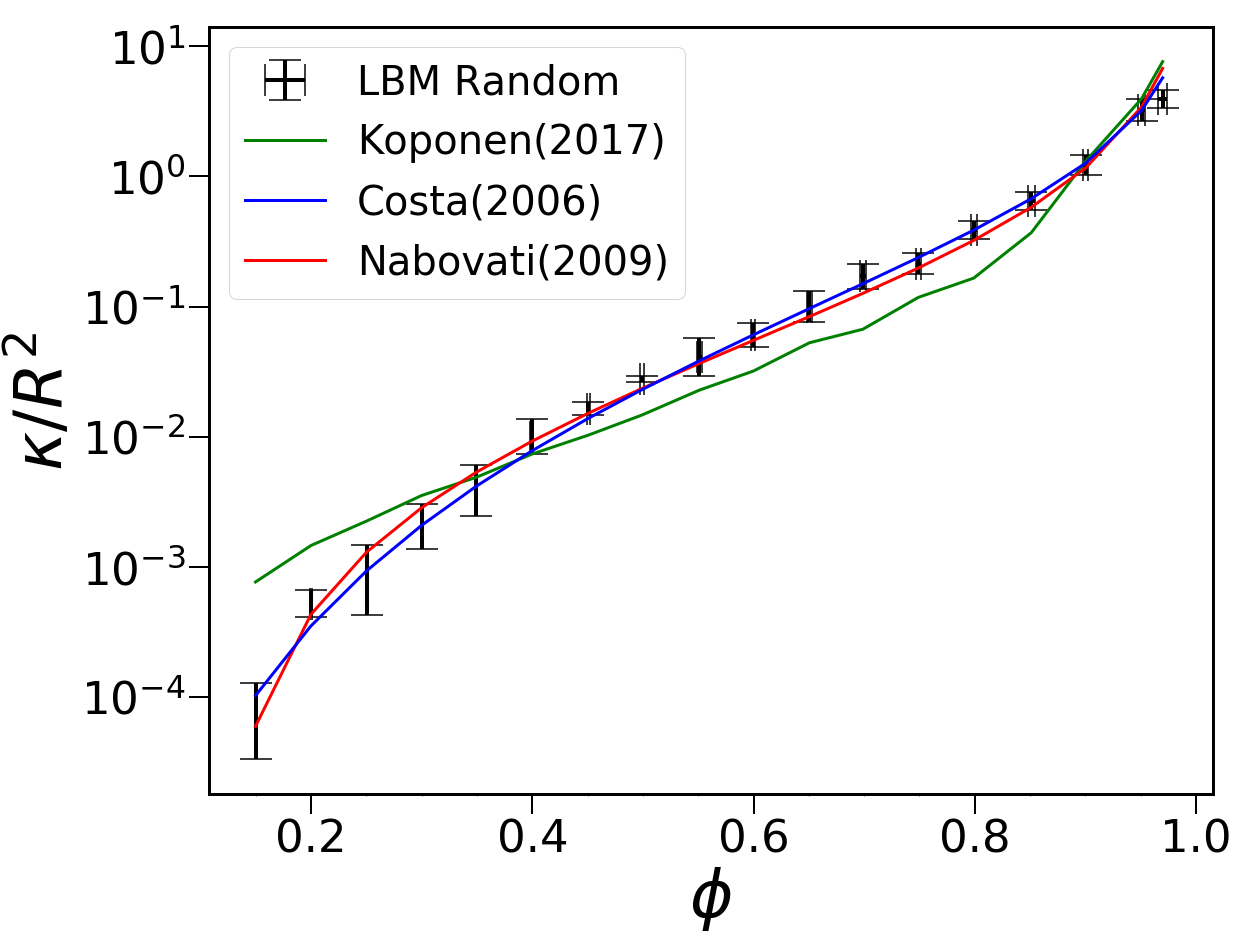

In [2]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy.optimize as optimize
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator


#load data
data = np.loadtxt('r12-overlap.txt')
data_s = np.loadtxt('specific_area_random.txt')
ko = np.loadtxt('koponen.txt')


per = data[:,2]
tor = data[:,1]
por = data[:,0]
s = data_s / (200**3*(1-por))

per_nor = per/(12**2)
per_nor = np.log10(per_nor)
per = per_nor

por_avg = np.mean(por.reshape(-1,6),axis=1)
per_avg = np.mean(per_nor.reshape(-1,6),axis=1)
tor_avg = np.mean(tor.reshape(-1,6),axis=1)
s_avg = np.mean(s.reshape(-1,6),axis=1)

por_stddev = np.std(por.reshape(-1,6),axis=1)
per_stddev = np.std(per_nor.reshape(-1,6),axis=1)
tor_stddev = np.std(tor.reshape(-1,6),axis=1)


por_err = por_stddev
per_err = per_stddev
tor_err = tor_stddev

x = por

y = 1/(tor**2 * s**2)



#define fit function
def koponen(x,a):
    return np.log10( y * ko* x**3 / (a*(1-x)**2) )

def Nabovati(x,d1,d2,d3):
    return np.log10 (d1 * (np.sqrt( (1-d2)/(1-x) ) - 1)**d3)

def costa(x,h1,h2):
    return  np.log10( h1 * x**h2 /(1-x))


#calculate fitting parameter and R2 
popt,pcov = curve_fit(koponen,x,per,200)
print "koponen fit:",popt
a = popt
koponen_fit = koponen(x,a)
residuals = per-koponen(x,a)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((per-per.mean())**2).sum()
r_squared = 1-(ss_res/ss_tot)
print "R2 for koponen fit:",r_squared



popt2,pcov2 = curve_fit(Nabovati,x,per,[0.28,0.13,2.1])
print "Nabovati fit:",popt2

d1 = popt2[0]
d2 = popt2[1]
d3 = popt2[2]
Nabovati_fit  = Nabovati(x,d1,d2,d3)
residuals2 = per-Nabovati(x,d1,d2,d3)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((per-per.mean())**2).sum()
r_squared2 = 1-(ss_res2/ss_tot2)
print "R2 for Nabovati fit:",r_squared2


popt3,pcov3 = curve_fit(costa,x,per,[0.15,3.8])
print "Costa fit:",popt3

h1 = popt3[0]
h2 = popt3[1]
costa_fit  = costa(x,h1,h2)
residuals3 = per-costa(x,h1,h2)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((per-per.mean())**2).sum()
r_squared3 = 1-(ss_res3/ss_tot3)
print "R2 for costa fit:",r_squared3


#calculate average value of fitting results
koponen_avg = np.mean(koponen_fit.reshape(-1,6),axis=1)
Nabovati_avg = np.mean(Nabovati_fit.reshape(-1,6),axis=1)
costa_avg = np.mean(costa_fit.reshape(-1,6),axis=1)



#plot error bar and fitting curve
fig, ax = plt.subplots()
fig.set_size_inches(17,13)
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.14, bottom=0.14, right=0.96, top=0.96)
ax.errorbar(por_avg, per_avg, xerr=por_err,yerr=per_err,capsize = 16, color='black', elinewidth = 4,markeredgewidth=1.5, label = 'LBM Random',ls = 'None')
ax.plot(por_avg,koponen_avg, 'g-',linewidth=3,label = 'Koponen(2017)')
ax.plot(por_avg, Nabovati_avg, 'r-',linewidth=3,label = 'Nabovati(2009)')
ax.plot(por_avg, costa_avg, 'b-',linewidth=3,label = 'Costa(2006)')


handles,labels = ax.get_legend_handles_labels()

handles = [handles[3], handles[0], handles[2],handles[1]]
labels = [labels[3], labels[0], labels[2],labels[1]]


plt.xlabel('$\phi$',fontsize = 66,fontweight='bold')
plt.ylabel(' $\kappa$/$R^2$',fontsize = 66)
ticks = ['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$','$10^{2}$']
ax.set_yticklabels(ticks)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
ax.tick_params(length=20, width=2, which='major')
xminorLocator = AutoMinorLocator()
yminorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(xminorLocator)
#ax.yaxis.set_minor_locator(yminorLocator)
#ax.tick_params(length=10, width=2,which='minor')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
ax.spines['left'].set_linewidth(3.0)
#plt.ylim(0.000001,10)
plt.legend(numpoints=1,loc=2,prop={'size':40})
ax.legend(handles,labels,numpoints=1,loc=2,prop={'size':40})
fig.savefig('fit_per_1.png')
plt.show()

koponen fit: [797.92134836]
R2 for koponen fit: 0.9142272891960423
Nabovati fit: [0.2740278  0.22126787 2.3057381 ]
R2 for Nabovati fit: 0.9999653767916814
Costa fit: [0.18445422 5.3021456 ]
0.18445421842467846 5.302145596805486
R2 for costa fit: 0.9973456062760029


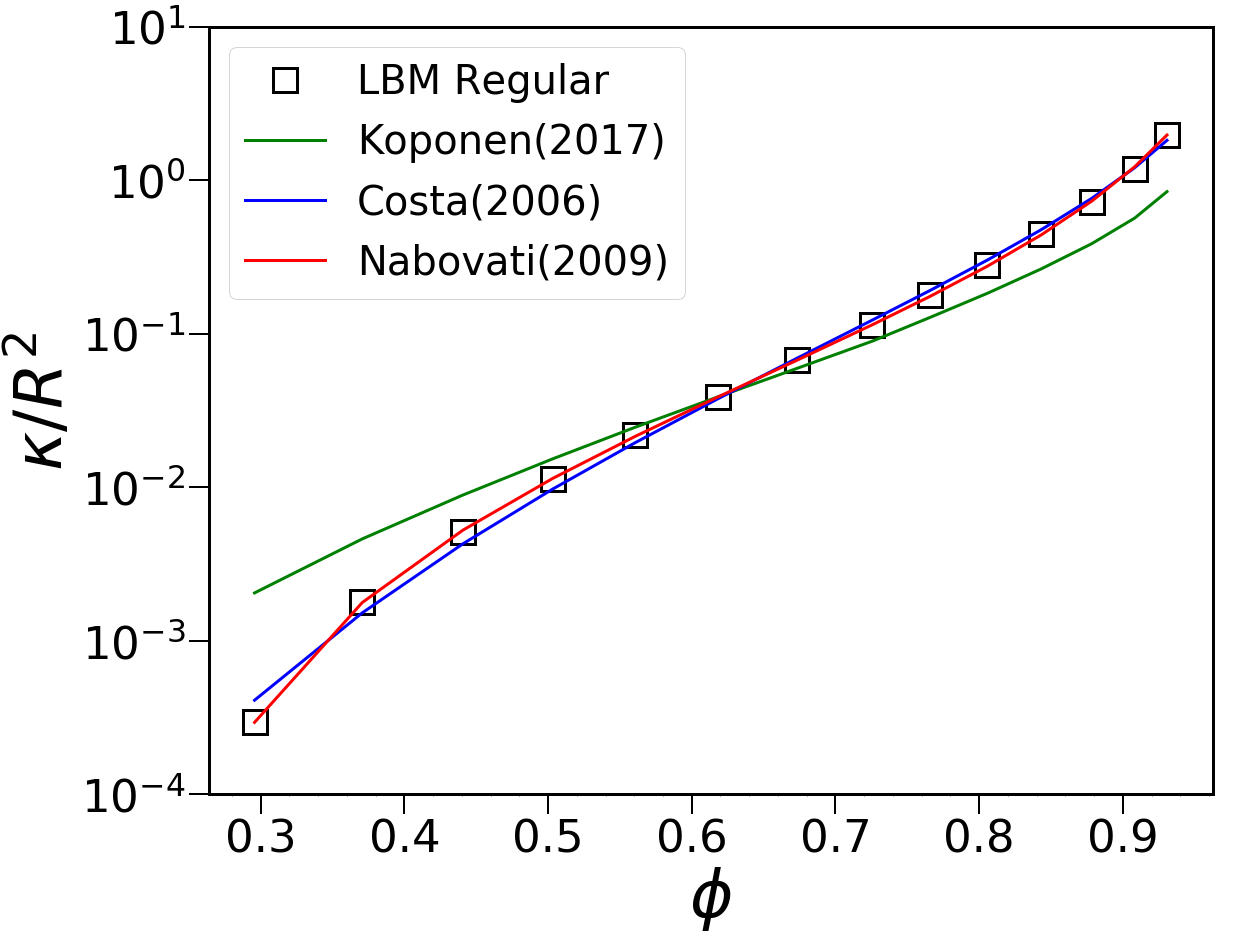

In [3]:
#!/usr/bin/env python


import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy.optimize as optimize
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator


#load data

data_re = np.loadtxt('regular')
data_s = np.loadtxt('specific_area_regular.txt')


per = data_re[:,3]
per_nor = data_re[:,3]/(data_re[:,0]**2)
per_nor = np.log10(per_nor)
s = data_s[:,6]
tor = data_re[:,2]
phi = data_re[:,1]


x = phi
y = 1/( tor**2 * s**2 )

#define fit function

def koponen(x,a):
    return   np.log10( (y * x**3) / (a*(1-x)**2) )


def costa(x,h1,h2):
    return  np.log10( h1 * x**h2 /(1-x) )


def nabovati(x,d1,d2,d3):
    return np.log10( d1 * (np.sqrt( (1-d2)/(1-x) ) - 1) ** d3 )


#calculate fitting parameter and R2 

popt,pcov = curve_fit(koponen,x,per_nor,140)
print "koponen fit:",popt
a = popt
koponen_fit = koponen(x,a)
residuals = per_nor-koponen(x,a)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((per_nor-per_nor.mean())**2).sum()
r_squared = 1-(ss_res/ss_tot)
print "R2 for koponen fit:",r_squared



popt2,pcov2 = curve_fit(nabovati,x,per_nor,[0.20,0.13,2.31])
print "Nabovati fit:",popt2
d1 = popt2[0]
d2 = popt2[1]
d3 = popt2[2]
nabovati_fit  = nabovati(x,d1,d2,d3)
residuals2 = per_nor-nabovati(x,d1,d2,d3)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((per_nor-per_nor.mean())**2).sum()
r_squared2 = 1-(ss_res2/ss_tot2)
print "R2 for Nabovati fit:",r_squared2



popt3,pcov3 = curve_fit(costa,x,per_nor,[0.15,3.8])
print "Costa fit:",popt3
h1 = popt3[0]
h2 = popt3[1]
print h1,h2
costa_fit  = costa(x,h1,h2)
residuals3 = per_nor-costa(x,h1,h2)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((per_nor-per_nor.mean())**2).sum()
r_squared3 = 1-(ss_res3/ss_tot3)
print "R2 for costa fit:",r_squared3



#plot error bar and fitting curve

fig, ax = plt.subplots()
fig.set_size_inches(17,13)
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.14, bottom=0.14, right=0.96, top=0.96)
plt.plot(phi,per_nor,'ks', markerfacecolor = 'none',markersize=24, markeredgecolor='black',markeredgewidth=3,linewidth=3, label = 'LBM Regular')
plt.plot(phi,koponen_fit , 'g-',linewidth=3,label = 'Koponen(2017)')
plt.plot(phi,costa_fit , 'b-',linewidth=3,label = 'Costa(2006)')
plt.plot(phi, nabovati_fit, 'r-',linewidth=3,label = 'Nabovati(2009)')

ticks = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$',]
plt.xlabel('$\phi$',fontsize = 66,fontweight='bold')
plt.ylabel(' $\kappa$/$R^2$',fontsize = 66)
ax.set_yticklabels(ticks)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
ax.tick_params(length=20, width=2, which='major')
xminorLocator = AutoMinorLocator()
yminorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(xminorLocator)
#ax.yaxis.set_minor_locator(yminorLocator)
#ax.tick_params(length=10, width=2,which='minor')
ax.set_ylim(-4,1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
ax.spines['left'].set_linewidth(3.0)

plt.legend(numpoints=1,loc=2,prop={'size':40})
fig.savefig('fit_reper_1.png')
plt.show()

MR fit for random geometry: [0.48314232]
Archie fit for random geometry: [0.36541092]
general fit for random geometry: [1.09027966 1.61727174]
general fit for regular geometry: [0.16206235 0.71175661]
archie fit for regular geometry: [0.12378891]
MR fit for regular geometry: [0.1320974]
R2 for mr fit of random 0.9270915068924335
R2 for archie fit of random 0.9045432589984438
R2 for general fit of random 0.9099680023383958
R2 for general fit of regular 0.998228803510718
R2 for archie fit of regular 0.5850921180076801
R2 for mr fit of regular 0.6376719289594546


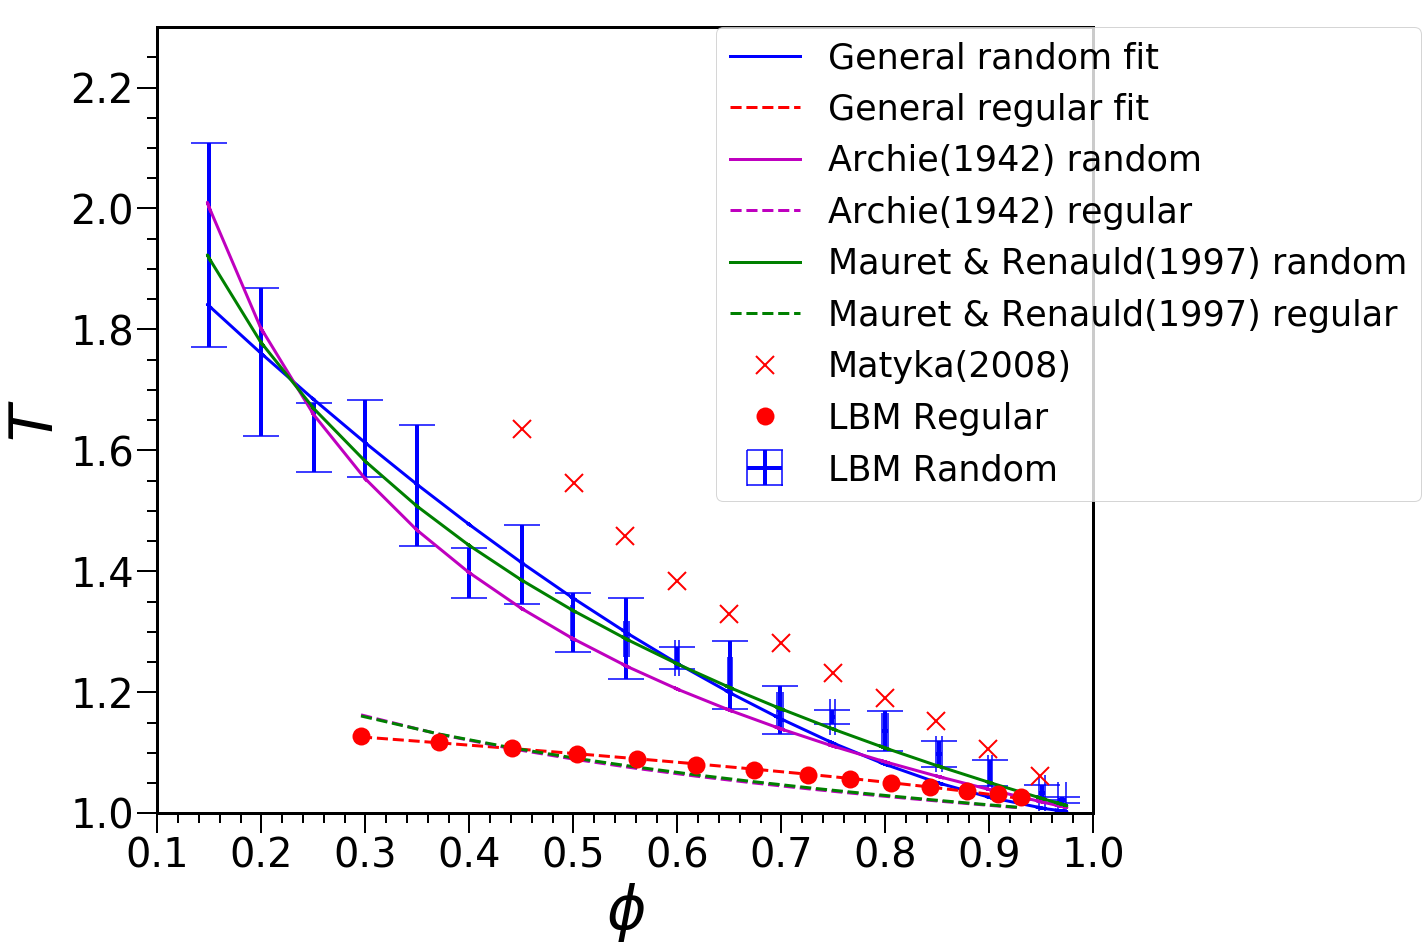

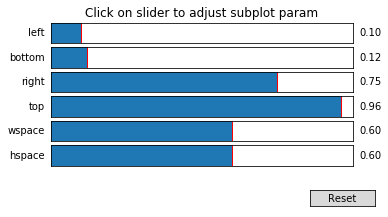

In [4]:
#!/usr/bin/env python


import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator


# load data
re = np.loadtxt('regular')
rand = np.loadtxt('r12-overlap.txt')
matyka = np.loadtxt('matyka')

phi = re[:,1]
T = re[:,2]

phi_rand = rand[:,0]
T_rand = rand[:,1]

phi_m = matyka[:,0]
T_m = matyka[:,1]

#calculate average value and standard deviation for tortuosity and porosity
por_avg = np.mean(phi_rand.reshape(-1,6),axis=1)
tor_avg = np.mean(T_rand.reshape(-1,6),axis=1)

por_stddev = np.std(phi_rand.reshape(-1,6),axis=1)
tor_stddev = np.std(T_rand.reshape(-1,6),axis=1)

por_err = por_stddev
tor_err = tor_stddev


# define fit function
def mr(x,p):
    return 1-p*np.log(x)

def archie(x,b):
    return x ** (-b)

def general(x,c,d):
    return 1+c*(1-x)**d


# calculate fitting parameter

xdata = phi_rand 
ydata = T_rand
popt,pcov =  curve_fit(mr, xdata, ydata)
popt1,pcov1 =  curve_fit(archie, xdata, ydata)
popt2,pcov2 =  curve_fit(general, xdata, ydata)
popt3,pcov3 =  curve_fit(general, phi, T)
popt4,pcov4 =  curve_fit(archie, phi, T)
popt5,pcov5 =  curve_fit(mr, phi, T)

print "MR fit for random geometry:",popt
print "Archie fit for random geometry:",popt1 
print "general fit for random geometry:",popt2 
print "general fit for regular geometry:" ,popt3
print "archie fit for regular geometry:" ,popt4
print "MR fit for regular geometry:" ,popt5



#calculate R2

p = popt
residuals = ydata-mr(xdata,p)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-ydata.mean())**2).sum()
r_squared = 1-(ss_res/ss_tot)
print "R2 for mr fit of random",r_squared


b1 = popt1
residuals1 = ydata-archie(xdata,b1)
ss_res1 = np.sum(residuals1**2)
ss_tot1 = np.sum((ydata-ydata.mean())**2).sum()
r_squared1 = 1-(ss_res1/ss_tot1)
print "R2 for archie fit of random",r_squared1


c2 = popt2[0]
d2 = popt2[1]
residuals2 = ydata-general(xdata,c2,d2)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((ydata-ydata.mean())**2).sum()
r_squared2 = 1-(ss_res2/ss_tot2)
print "R2 for general fit of random",r_squared2


c3 = popt3[0]
d3 = popt3[1]
residuals3 = T-general(phi,c3,d3)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((T-T.mean())**2).sum()
r_squared3 = 1-(ss_res3/ss_tot3)
print "R2 for general fit of regular",r_squared3


b4 = popt4
residuals4 = T-archie(phi,b4)
ss_res4 = np.sum(residuals4**2)
ss_tot4 = np.sum((T-T.mean())**2).sum()
r_squared4 = 1-(ss_res4/ss_tot4)
print "R2 for archie fit of regular",r_squared4


p5 = popt5
residuals5 = T-mr(phi,p5)
ss_res5 = np.sum(residuals5**2)
ss_tot5 = np.sum((T-T.mean())**2).sum()
r_squared5 = 1-(ss_res5/ss_tot5)
print "R2 for mr fit of regular",r_squared5


# plot error bar and fitting curve
fig, ax = plt.subplots()
#plt.yscale('log')
fig.set_size_inches(20,13)
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.1, bottom=0.12, right=0.75, top=0.96)
plt.subplot_tool()
plt.errorbar(por_avg, tor_avg, xerr=por_err,yerr=tor_err,color='blue',capsize = 18,elinewidth= 4,markeredgewidth=1.5,label = 'LBM Random',ls = 'None')
plt.plot(xdata, general(xdata, *popt2), 'b-',linewidth=3, label = 'General random fit')
plt.plot(phi, general(phi, *popt3), 'r--',linewidth=3, label = 'General regular fit')
plt.plot(xdata, archie(xdata, *popt1), 'm-',linewidth=3, label = 'Archie(1942) random')
plt.plot(phi, archie(phi, *popt4), 'm--',linewidth=3, label = 'Archie(1942) regular')
plt.plot(xdata, mr(xdata, *popt), 'g-',linewidth=3, label = 'Mauret & Renauld(1997) random')
plt.plot(phi, mr(phi, *popt5), 'g--',linewidth=3, label = 'Mauret & Renauld(1997) regular')
plt.plot(phi_m,T_m,color='red', marker='x', linewidth=0,markeredgewidth = 2,markersize=18, label = 'Matyka(2008)')
plt.plot(phi,T,color='red', marker='o', linewidth=0,markeredgecolor='none',markersize=18, label = 'LBM Regular')


plt.xlabel('$\phi$',fontsize = 60)
plt.ylabel('$T$',fontsize = 60)
plt.xticks(fontsize=42)
plt.yticks(fontsize=42)
ax.tick_params(length=20, width=2, which='major')
xminorLocator = AutoMinorLocator()
yminorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.tick_params(length=10, width=2,which='minor')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
ax.spines['left'].set_linewidth(3.0)

plt.xlim(0.1, 1.0)
plt.ylim(1.0, 2.3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(bbox_to_anchor=(1.35,1),borderaxespad=0.,numpoints=1,prop={'size':35})
fig.savefig('fit_tor.png')
plt.show()